In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./submission.csv
./Project_1.ipynb
./.ipynb_checkpoints/Project_1-checkpoint.ipynb
./.ipynb_checkpoints/submission-checkpoint.csv
./.git/COMMIT_EDITMSG
./.git/description
./.git/HEAD
./.git/config
./.git/index
./.git/objects/5c/c466e97cf12f155d19b9f717425214075d0b7a
./.git/objects/e1/dbcbc8f96e2bd1ba6883b054b5587389ed772f
./.git/objects/34/568cc3e44978ab6aa0f57fbe6e3dead43a72f0
./.git/objects/dc/b4e364e04dcd64ac521cb0850228ec2ef93bbb
./.git/objects/3d/77e60950e81918897608a63b7700eeaf1413ec
./.git/objects/e4/6db70ee3c278e047186788610b75e107040ebc
./.git/objects/4b/825dc642cb6eb9a060e54bf8d69288fbee4904
./.git/objects/fc/24f9d7479e992bc532feea6c07d902d78043f7
./.git/objects/c3/633ac7fdbe76c16036240ba57e9f2caff573d0
./.git/refs/heads/main
./.git/refs/remotes/origin/main
./.git/logs/HEAD
./.git/logs/refs/heads/main
./.git/logs/refs/remotes/origin/main
./.git/info/exclude
./.git/hooks/applypatch-msg.sample
./.git/hooks/commit-msg.sample
./.git/hooks/pre-applypatch.sample
./.git/hooks/pre-re

In [141]:
train_data = pd.read_csv("./data/titanic.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women * 100)

% of women who survived: 74.20382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men * 100)

% of men who survived: 18.890814558058924


In [21]:
child = train_data.loc[train_data.Age <= 13.0]["Survived"]
rate_child = sum(child)/len(child)

print("% of children who survived:", rate_child * 100)

% of children who survived: 59.154929577464785


In [22]:
child = train_data.loc[train_data.Age <= 10.0]["Survived"]
rate_child = sum(child)/len(child)

print("% of children who survived:", rate_child * 100)

% of children who survived: 59.375


In [23]:
child = train_data.loc[train_data.Age <= 8.0]["Survived"]
rate_child = sum(child)/len(child)

print("% of children who survived:", rate_child * 100)

% of children who survived: 66.66666666666666


In [31]:
siblings = train_data.loc[train_data.SibSp > 0]["Survived"]
rate_siblings = sum(siblings)/len(siblings)

print("% of siblings or spouses who survived:", rate_siblings * 100)

% of siblings or spouses who survived: 46.64310954063604


In [32]:
siblings = train_data.loc[train_data.SibSp > 1]["Survived"]
rate_siblings = sum(siblings)/len(siblings)

print("% of siblings or spouses who survived:", rate_siblings * 100)

% of siblings or spouses who survived: 27.027027027027028


In [33]:
siblings = train_data.loc[train_data.SibSp > 2]["Survived"]
rate_siblings = sum(siblings)/len(siblings)

print("% of siblings or spouses who survived:", rate_siblings * 100)

% of siblings or spouses who survived: 15.217391304347828


In [34]:
siblings = train_data.loc[train_data.SibSp > 3]["Survived"]
rate_siblings = sum(siblings)/len(siblings)

print("% of siblings or spouses who survived:", rate_siblings * 100)

% of siblings or spouses who survived: 10.0


In [35]:
siblings = train_data.loc[train_data.SibSp > 4]["Survived"]
rate_siblings = sum(siblings)/len(siblings)

print("% of siblings or spouses who survived:", rate_siblings * 100)

% of siblings or spouses who survived: 0.0


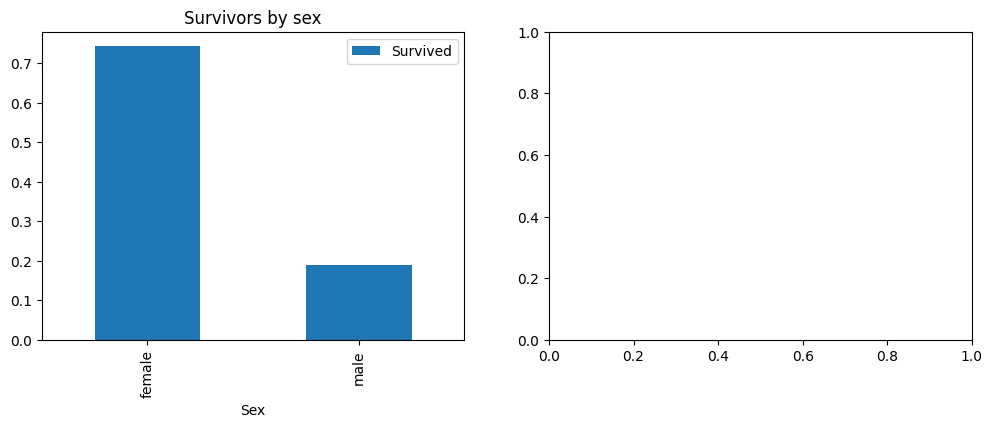

In [45]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
plt.show()


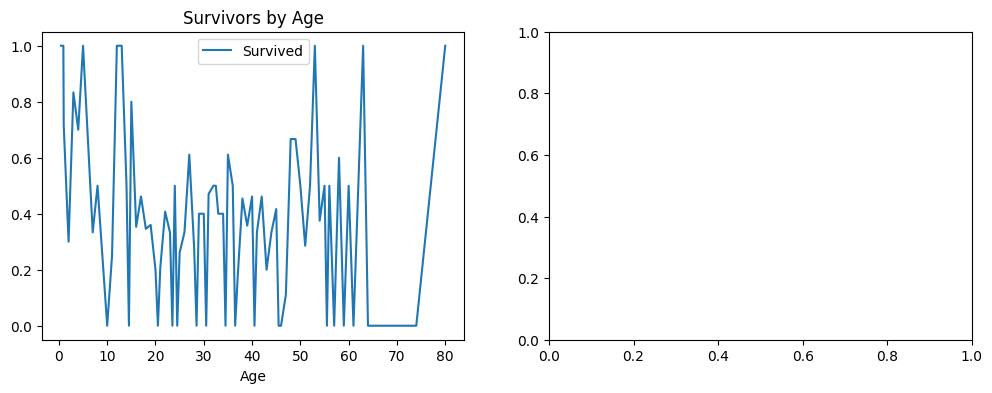

In [52]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train_data[['Age', 'Survived']].groupby(['Age']).mean().plot.line(ax=ax[0]) 
ax[0].set_title('Survivors by Age') 
plt.show()


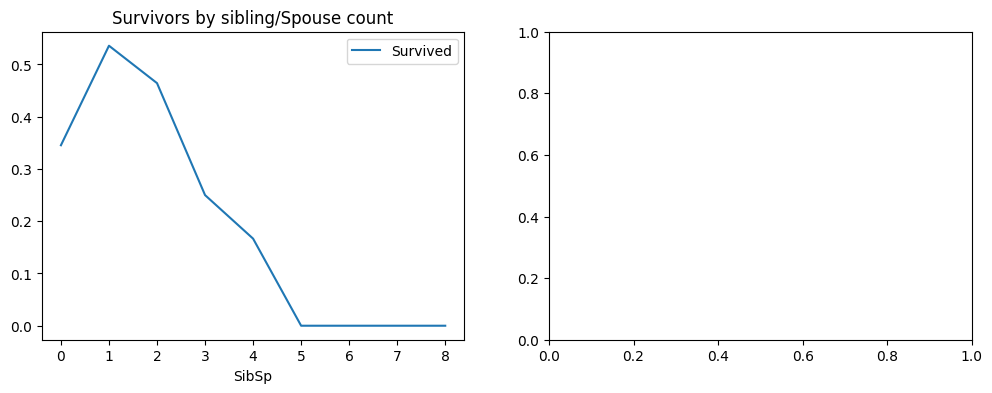

In [51]:
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.line(ax=ax[0]) 
ax[0].set_title('Survivors by sibling/Spouse count') 
plt.show()

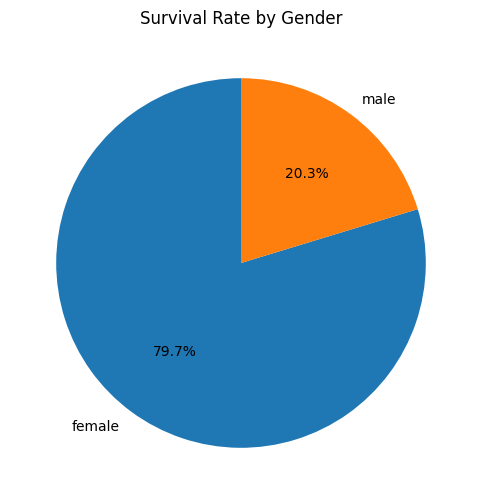

In [67]:
%matplotlib inline

mean_survival = train_data.groupby('Sex')['Survived'].mean()

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(mean_survival, labels=mean_survival.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Survival Rate by Gender')
plt.show()

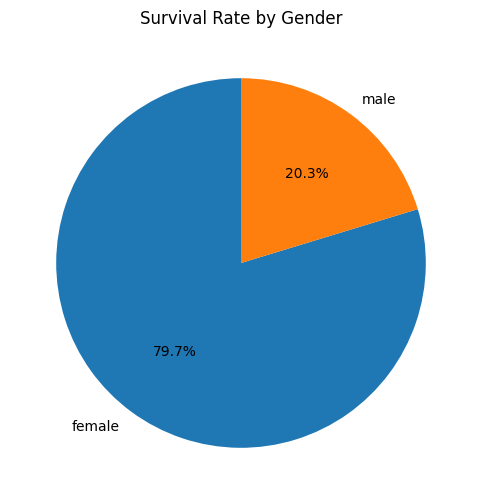

In [70]:
%matplotlib inline

mean_survival = train_data.groupby('Sex')['Survived'].mean()

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(mean_survival, labels=mean_survival.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Survival Rate by Gender')
plt.show()

/tmp/ipykernel_1217835/3092142218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train_data.groupby(pd.cut(train_data['Age'], bins=[0,10,20,30,40,50,60,70,80,90]))['Survived'].mean()


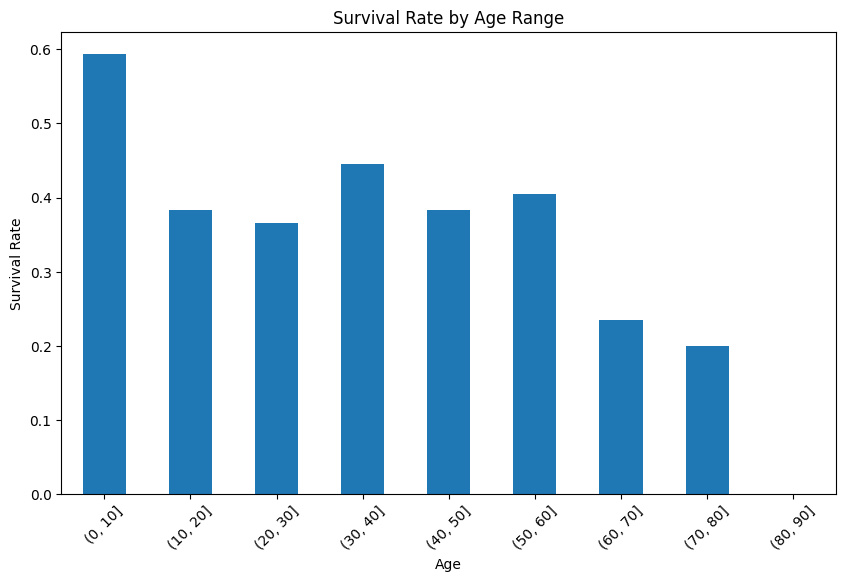

In [73]:
age_survival = train_data.groupby(pd.cut(train_data['Age'], bins=[0,10,20,30,40,50,60,70,80,90]))['Survived'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
age_survival.plot(kind='bar', ax=ax)
ax.set_title('Survival Rate by Age Range')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_1217835/4213664894.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train_data.groupby(pd.cut(train_data['Fare'], bins=[0,50,100,150,200,250,300]))['Survived'].mean()


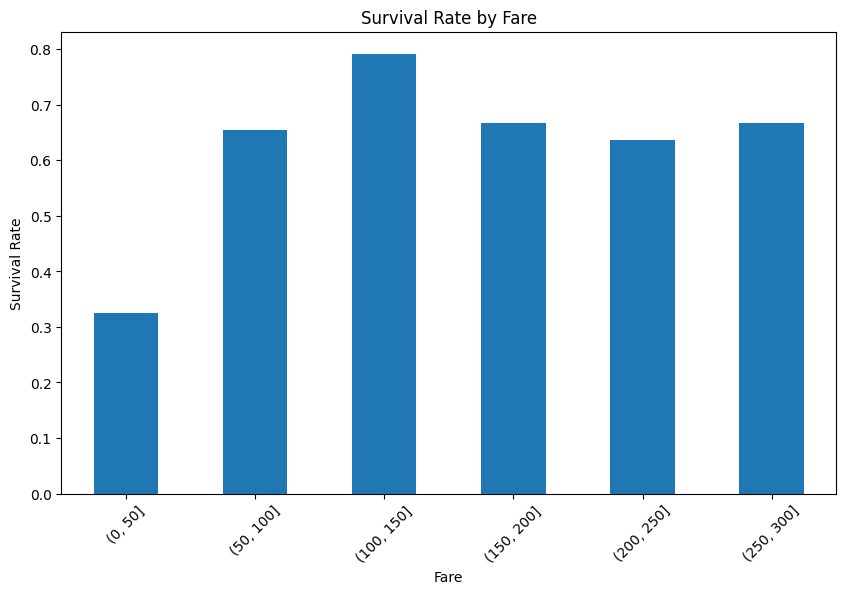

In [76]:
age_survival = train_data.groupby(pd.cut(train_data['Fare'], bins=[0,50,100,150,200,250,300]))['Survived'].mean()


fig, ax = plt.subplots(figsize=(10, 6))
age_survival.plot(kind='bar', ax=ax)
ax.set_title('Survival Rate by Fare')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

In [211]:
split_train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=1)

y = split_train_data["Survived"]
y_test = test_data["Survived"]

features = ["Age", "Sex", "Fare", "Pclass"]
X = pd.get_dummies(split_train_data[features])
X_test = pd.get_dummies(test_data[features])


model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=3)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.3f}")

Model Accuracy: 0.804


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [ ]:
An AI model must be trained on the titanic data to be able to predict 
which passengers were able to survive the sinking. This will be done using a 
spreadsheet of passenger data from the original Titanic. This data must be cleaned 
and then analyzed in order to find patterns.


# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [ ]:
The data was provided to us by our instructor in a csv file.

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [ ]:
Around 74% of women survived while only 19% of men survived. 
The three largest predictors of survival seem to be gender, age, and combined amount of fellow relatives on board.

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [ ]:
For modeling, the age, sex, Pclass, and fare data were isolated since they appeared to be the most
statistically significant predictors in the data exploration step. 
This helped make sure it was a smaller dataset that still showed strong patterns. 
I also split the data into training and testing sets so I could 
evaluate the accuracy of the model properly.

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [ ]:
I decided to use a random forest classifier for this task since it used similar logic to what we used when initially exploring the data. That method being checking different values
to see if they were higher or lower than different threshholds. I also decided this would be the best since these values were mostly disparate and at times were not measured ina consistent way
that could easily be combined together. This ould provide a good way of providing a thorough and complex reasoning and thresholds. This kind of algorithm is also very easy to increase 
in scale and precision.

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


In [ ]:
Since Scikit already has a premade implementation of the binary tree system, just implementing it into the code was very easy. Outside of the random seed which allowed us to try multiple times until 
the most accurate forest is made, the function also allows us to increase the amount of estimators and the depth of the forest itself. The depth would essentially mean that the system of threshholds 
is more complex and the estimator amount would just make the predictions more precise. What I found is that after the 150 mark for estimators and the 10 mark for forest depth, there were diminishing
returns on model accuracy.

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


In [ ]:
In our research, we found there were four key features that could predict passenger death on the titanic up to over 80% accuracy. These four things were the gender, age, price of fare,
and socioeconmic status of the passenger in question. The most likely explanation for gender and age is that women and children were often prioritized over others to be saved on sinking ships at the time,
therefore allowing them to get to safety earlier, while many of the men were left behind. The pricing and fares were most likely related to the placement of more expensive and luxurious seats on the boat
making for easier escape routes once disaster struck. Combining these two factors serves as a great predictor for who would be able to survive a sinking ship scenario.

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [217]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("./data/titanic.csv")
train_data.head()

def infrence(estimators, depth, seed):
    split_train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=1)

    y = split_train_data["Survived"]
    y_test = test_data["Survived"]

    features = ["Age", "Sex", "Fare", "Pclass"]
    X = pd.get_dummies(split_train_data[features])
    X_test = pd.get_dummies(test_data[features])


    model = RandomForestClassifier(n_estimators=estimators, max_depth=depth, random_state=seed)
    model.fit(X, y)
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    output.to_csv('submission.csv', index=False)
    results = accuracy_score(y_test, predictions)
    return results 

print(f"Model Accuracy: %{infrence(150, 10, 3) * 100:.3f}")

Model Accuracy: %80.447


# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project